In [23]:
# KNN Regression model to be trained with various values of k
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors
import mltools as ml

In [28]:
def shuffle_rows(arr,rows):
    np.random.shuffle(arr[rows[0]:rows[1]+1])

def MSE(Y, Yhat):
    return np.sum((Y-Yhat)**2)

data = np.genfromtxt('final.csv', delimiter = ",")

shuffle_rows(data[1:data.shape[0]-1], [0,data.shape[0]-1])
X = data[1:data.shape[0]-1, 1:7]
Y = data[1:data.shape[0]-1, 7:8]
tr = int(X.shape[0]*0.8)
te = X.shape[0] - tr
Xtr = X[0:tr]
Xte = X[tr:tr+te]
Ytr = Y[0:tr]
Yte = Y[tr:tr+te]

k_values = np.arange(1, 99, 3, dtype = int)

errors_te = []
errors_tr = []
for k in k_values:
    knn = neighbors.NearestNeighbors(n_neighbors=k)
    knnc = neighbors.NearestCentroid()
    knnr = neighbors.KNeighborsRegressor(n_neighbors=k)
    knnr.fit(Xtr, Ytr)
    Yhat_te = knnr.predict(Xte)
    Yhat_tr = knnr.predict(Xtr)
    # print("K:", k, "MSE:", MSE(Yte, Yhat_te))
    errors_te.append(MSE(Yte, Yhat_te))
    errors_tr.append(MSE(Ytr, Yhat_tr))

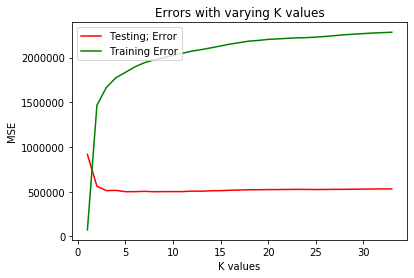

In [25]:
plt.title("Errors with varying K values")
plt.plot(np.arange(1, 34), errors_te, color = "red", label= "Testing; Error")
plt.plot(np.arange(1, 34), errors_tr, color = "green", label="Training Error")
plt.xlabel("K values")
plt.ylabel("MSE")
plt.legend(loc="upper left")
plt.show()

In [27]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights)
    clf.fit(X, y)

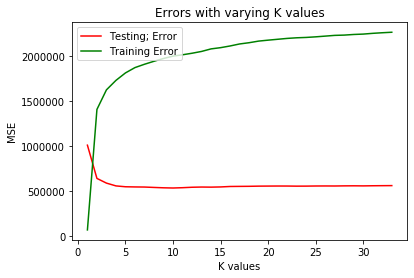

In [17]:
plt.title("Errors with varying K values")
plt.plot(np.arange(1, 34), errors_te, color = "red", label= "Testing; Error")
plt.plot(np.arange(1, 34), errors_tr, color = "green", label="Training Error")
plt.xlabel("K values")
plt.ylabel("MSE")
plt.legend(loc="upper left")
plt.show()